In [83]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import powerlaw
from tqdm import tqdm
from matplotlib.colors import LinearSegmentedColormap
import colorsys
from matplotlib import animation, rc
from IPython.display import HTML

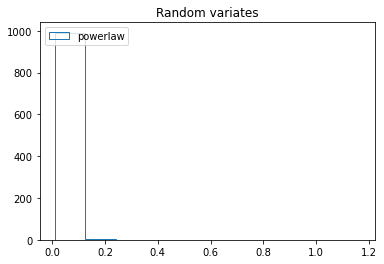

In [74]:
theoretical_distribution = powerlaw.Power_Law(
    xmin=0.001,xmax=1.0, parameters=[2.8], discrete=False
)
# take 1000 random variates
np.random.seed(0)

simulated_data = eta*theoretical_distribution.generate_random(1000)

plt.hist(simulated_data, histtype='step', label='powerlaw')
plt.title('Random variates')
plt.legend(loc='upper left')

In [42]:
np.random.binomial(1,min(1,10))

1

In [119]:
n=1000
m=2
eta=100
nodes=np.arange(0,n)
activity= eta*theoretical_distribution.generate_random(1000)
graph_list=[]

G=nx.Graph()
G.add_nodes_from(nodes)
graph_list+=[G]

for ii in range(300):
    G=nx.Graph()
    G.add_nodes_from(nodes)
    active_nodes=[]

    for node_id,aa in zip(nodes,activity):
        # print(node_id,aa)
        if np.random.binomial(1,min(1,aa)):
            active_nodes+=[node_id]
    for a_node_id in active_nodes:
        a=[(a_node_id,np.random.randint(len(nodes))) for ii in range(m)]
        # print(a)
        G.add_edges_from(a)
    # print(len(active_nodes))
    # pos=nx.spring_layout(G,k=1)
    graph_list+=[G]
    # nx.draw(G,pos=pos,node_shape='o',node_size=[10+v*100 for v in dict(G.degree).values()])

In [87]:
len(graph_list)

31

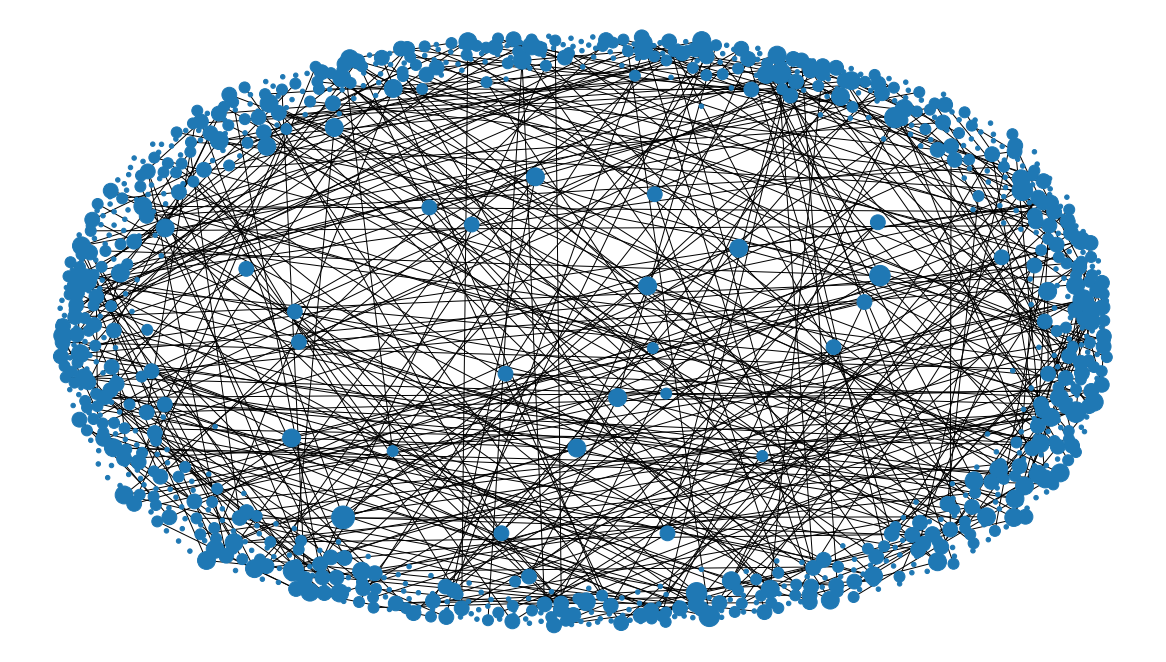

In [127]:
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
# initialization function: plot the background of each frame
def init_graph():
    plt.plot()

# animation function. This is called sequentially
def animate_graph(ii):
    plt.clf()
    node_size=[20+v*100 for v in dict(graph_list[ii].degree).values()]
    nx.draw(graph_list[ii],pos= pos,  vmin=0, vmax=2,node_size=node_size)
    # red_circle = mlines.Line2D(range(1),range(1),color="white", marker='o', markerfacecolor="red",markersize=10)
    # green_circle = mlines.Line2D(range(1),range(1),color="white", marker='o', markerfacecolor="green",markersize=10)
    # blue_circle=mlines.Line2D(range(1),range(1),color="white", marker='o', markerfacecolor="blue",markersize=10)
    # plt.legend((green_circle,red_circle,blue_circle),('Healthy','Sick','Vaccinated'))


#create initial layout for plots
pos=nx.spring_layout(G,k=1)

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=((16,9)))
plt.title('Time evolution of SIS model with vaccination')
#create custom color map to disinguish between sick, healthy and vaccinated
colors = [ (0.1, 0.9, 0),(0.9, 0.1, 0), (0, 0, 1)]
cmap = LinearSegmentedColormap.from_list('cmap_own', colors, N=3)

# call the animator
anim = animation.FuncAnimation(fig, animate_graph, init_func=init_graph, interval=100,frames=len(graph_list))
rc('animation', html='html5')
# anim.save("Graph.gif", dpi=300, writer=PillowWriter(fps=25))
# save animation to file
# writer = animation.writers['ffmpeg']
writer = FFMpegWriter(fps=60, metadata=dict(artist='Me'), bitrate=2500)
anim.save('time_evolution_of_graph.mp4', writer=writer)
# anim

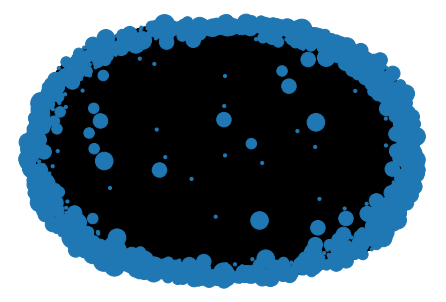

In [121]:
H=nx.Graph()
H.add_nodes_from(nodes)
for graph in graph_list:
     H.add_edges_from(list(H.edges())+list(graph.edges()))
nx.draw(H,pos=pos,node_shape='o',node_size=[10+v*100 for v in dict(G.degree).values()])

Text(0.5, 1.0, 'Wykres dla m=2, $\\gamma$=-1.35')

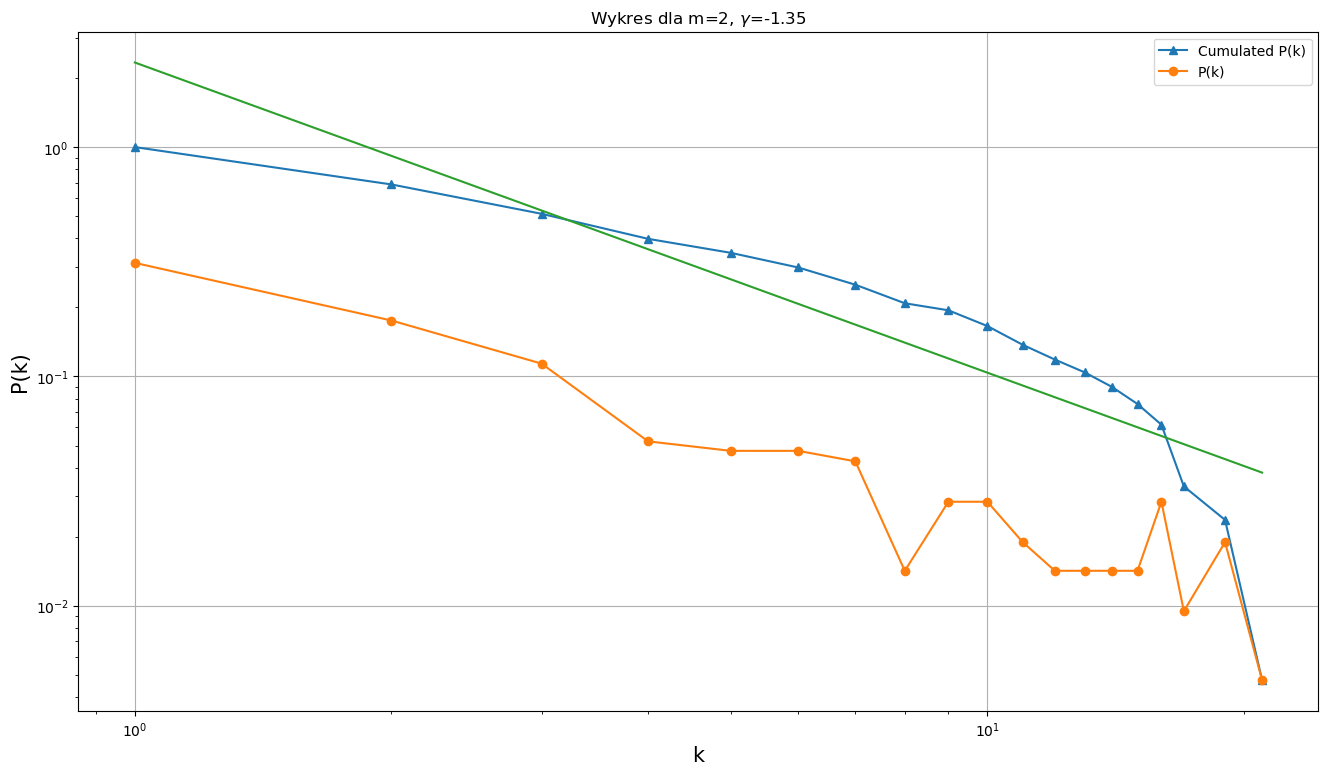

In [123]:
node_list=list(dict(H.degree).values())
vals,counts=np.unique(node_list,return_counts=True)
vals,counts=np.unique(counts,return_counts=True)

prob=counts/np.sum(counts)
cum_sum=np.cumsum(prob[::-1])[::-1]


plt.figure(figsize=(16,9),dpi= 100)
plt.loglog(vals,cum_sum,"^-",label="Cumulated P(k)")

logx = np.log(vals)
logy = np.log(cum_sum)
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)
yfit = lambda x: np.exp(poly(np.log(x)))
plt.loglog(vals,prob,"o-",label="P(k)")
plt.loglog(vals,yfit(vals))
plt.legend()
plt.grid()
plt.xlabel("k",fontsize=15)
plt.ylabel("P(k)",fontsize=15)
plt.title(f"Wykres dla m={m}, $\gamma$={np.round(coeffs[0],2)}")